In [1]:
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

In [3]:
filename = './USA-road-d.NY.co/USA-road-d.NY.co' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
x_list = []
y_list = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v, id, x_loc, y_loc = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(id))  # 添加新读取的数据
        item.append(int(x_loc))
        item.append(int(y_loc))
        Efield.append(item)
        x_list.append(int(x_loc))
        y_list.append(int(y_loc))
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item) """
city_show_num = 264346
x_list = np.array(x_list)[0:city_show_num]
y_list = np.array(y_list)[0:city_show_num]

city_co = np.array(Efield)
print(city_co)
print(len(x_list))

[[        1 -73530767  41085396]
 [        2 -73530538  41086098]
 [        3 -73519366  41048796]
 ...
 [   264344 -73820681  40994683]
 [   264345 -73714376  41004205]
 [   264346 -73917690  41291980]]
264346


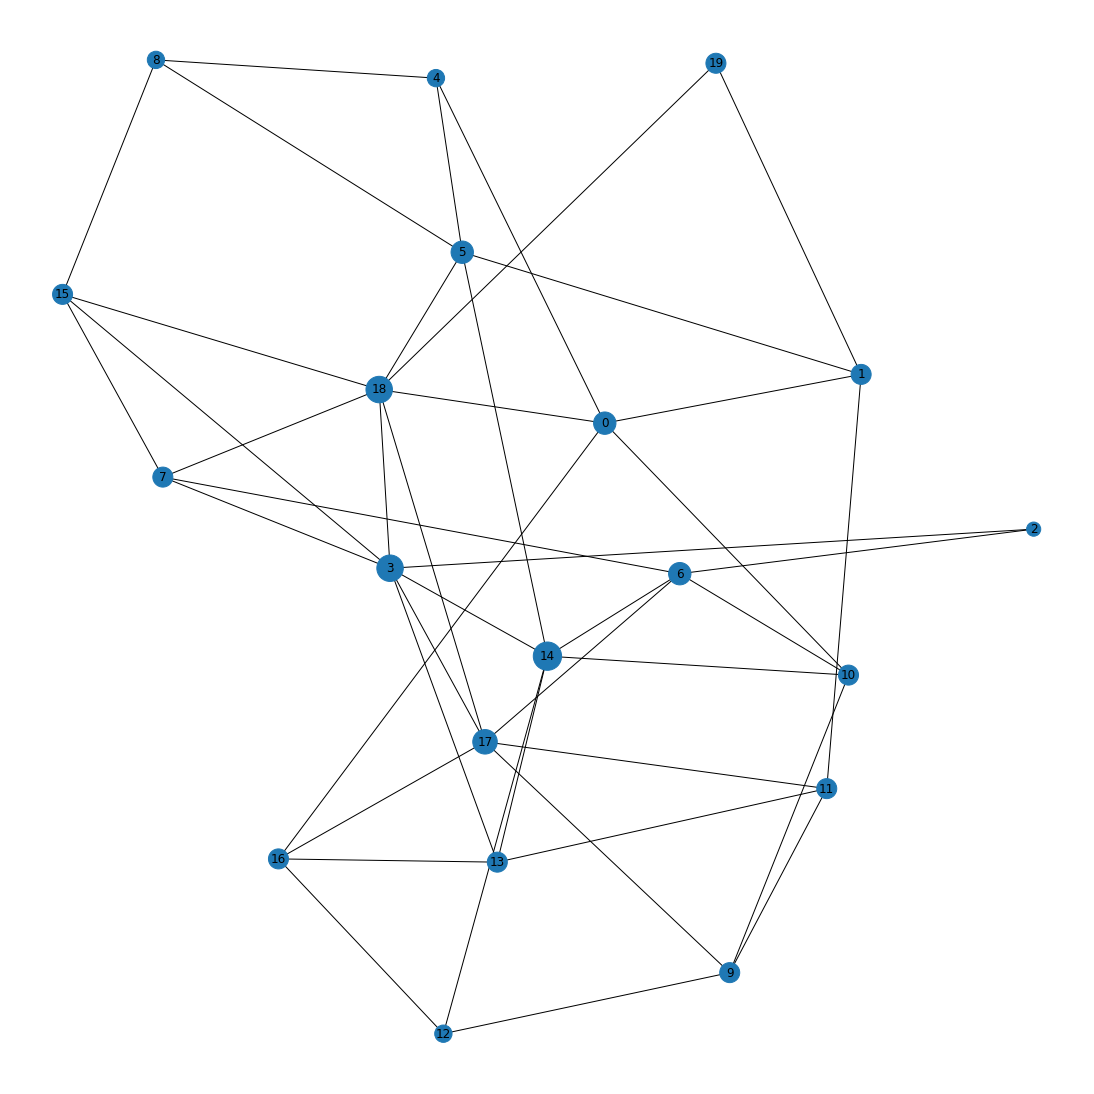

In [29]:
G.clear()
plt.figure(figsize=(15, 15))
for i in range(20):
    G.add_node(i)
abc_list = []
while True:
    a = np.random.randint(0,20)
    b = np.random.randint(0,20)
    c = np.random.randint(5,10)
    abc = (a,b,c)
    if abc in abc_list:
        continue
    else:
        G.add_weighted_edges_from([abc])
        abc_list.append(abc)

    if len(abc_list) == 50:
        break

# G.add_edge(1,2)
# G.add_weighted_edges_from([(1,2,10)])
# G.add_weighted_edges_from([(1,3,5)])
# for x in G.succ[1]:
#     print(G.get_edge_data(1, x)['weight'])
# print(G.succ[1].keys())
'''
for x in bc_G.value.succ[1]:
    print(x)
    print(bc_G.value.get_edge_data(1, x)['weight'])
'''
G = G.to_undirected()
d = dict(G.degree)
nx.draw(G,with_labels=True,nodelist=d.keys(), node_size=[v * 100 for v in d.values()])
plt.savefig("test_map.png")

In [7]:
G.get_edge_data(1, 2)['weight']

10

In [6]:
bc_G = sc.broadcast(G)


In [7]:
for x in bc_G.value.succ[1]:
    print(x)
    print(bc_G.value.get_edge_data(1, x)['weight'])

2
10
3
5


In [9]:

G_1 = nx.DiGraph()
G_2 = nx.DiGraph()
G_list = [G_1, G_2]
G_list_RDD = sc.parallelize([G])
G_list_RDD.map(lambda x: x.get_edge_data(1, 2)['weight']).collect()

[10]

In [48]:
G.clear()
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(4,5),(4,6),(5,6)])
try:
    path=nx.shortest_path(G,1,6)
    print(path)
except nx.NetworkXNoPath:
    print('No path')

[1, 4, 6]


In [4]:
filename = './USA-road-d.NY.gr/USA-road-d.NY.gr' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
x_list = []
y_list = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        a, v_i, v_j, dis_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(dis_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

dis_table = np.array(Efield)
print(dis_table)

[[     1      2    803]
 [     2      1    803]
 [     3      4    158]
 ...
 [263813 263466    106]
 [261228 259707    389]
 [259707 261228    389]]


In [14]:
# plt.figure(figsize=(20, 20))
import time
ST_list = [(206201,205280), (20600,224103), (75500, 23789),(4660, 130000),(19700,240740), (1,263848),
(52568, 98600), (111485, 29165),(2980,49190), (252400,70600)]
for (S, T) in ST_list:
    t1 = time.time()

    G.clear()
    for i in range(len(city_co)):
        G.add_node(city_co[i,0])

    for i in range(len(dis_table)):
        G.add_edge(dis_table[i,0],dis_table[i,1])
        G.add_weighted_edges_from([(dis_table[i,0],dis_table[i,1],dis_table[i,2])])


    path=nx.dijkstra_path(G,S ,T,weight='weight')
    weight = nx.dijkstra_path_length(G,S, T,weight='weight')
    # print(path)
    t2 = time.time()
    print("S:",S,"--T:",T)
    print("dis:", weight)
    print("time cost:", t2 - t1)
# G = G.to_undirected()
# nx.draw(G,node_size = 0.1,width = 0.2)
# plt.savefig("youxiangtu.png")
# plt.show()

S: 206201 --T: 205280
dis: 23651
time cost: 4.009453773498535
S: 20600 --T: 224103
dis: 408119
time cost: 5.798358678817749
S: 75500 --T: 23789
dis: 594206
time cost: 5.490359544754028
S: 4660 --T: 130000
dis: 749218
time cost: 7.482846975326538
S: 19700 --T: 240740
dis: 347392
time cost: 5.079670667648315
S: 1 --T: 263848
dis: 161896
time cost: 4.02483344078064
S: 52568 --T: 98600
dis: 388099
time cost: 6.395233154296875
S: 111485 --T: 29165
dis: 154034
time cost: 4.119062185287476
S: 2980 --T: 49190
dis: 714546
time cost: 6.800617933273315
S: 252400 --T: 70600
dis: 598294
time cost: 7.141940355300903


In [4]:
# -*- coding: utf-8 -*-
import random
import copy
import time
import numpy as np
import sys
import math
import tkinter #//GUI模块
import threading
import pandas as pd
from functools import reduce
from adjacency_list import Vertex,Graph

# 参数
'''
ALPHA:信息启发因子，值越大，则蚂蚁选择之前走过的路径可能性就越大
      ，值越小，则蚁群搜索范围就会减少，容易陷入局部最优
BETA:Beta值越大，蚁群越就容易选择局部较短路径，这时算法收敛速度会
     加快，但是随机性不高，容易得到局部的相对最优
'''
(ALPHA, BETA, RHO, Q) = (1.0,1.0,0.3,1000)
# 城市数，蚁群
(city_num, ant_num) = (264346,100)
distance_adja_graph = Graph()
pheromone_adja_graph = Graph()
for i in range(city_num):
    distance_adja_graph.addVertex(i)
    pheromone_adja_graph.addVertex(i)

In [5]:
def initial_map():
        # 初始化邻接表
    distance_adja_graph.clear()
    pheromone_adja_graph.clear()
    initial_pheromone = 1
    for item in dis_table:
        #if item[0] <= 64346 and item[1] <= 64346:
        distance_adja_graph.addEdge(item[0],item[1],item[2])
        pheromone_adja_graph.addEdge(item[0],item[1],initial_pheromone)

In [6]:
initial_map()

## 找出整张图的区域枢纽点
整张图的节点总数为264346。若设定枢纽点的个数为全图的1%，则需要找出2643个枢纽点。

对于每个点，统计其度，以及平衡值。

1. 对于度，按照降序进行排列，找出全图2%的节点。

2. 在上面的2%的节点中，以平衡值，按照升序进行排列，找出全图1%的节点。

平衡值的计算公式为：
$$EV(u)=\frac{1}{n} \times [\frac{1}{D(v_{1})} \times \frac{w(u,v_1)}{\sum_{i=1}^n w(u,v_i)} + \frac{1}{D(v_{2})} \times \frac{w(u,v_2)}{\sum_{i=1}^n w(u,v_i)} + ... + \frac{1}{D(v_{n})} \times \frac{w(u,v_n)}{\sum_{i=1}^n w(u,v_i)}]$$

其中D为节点的度，w为两节点间连边的权值。u为当前节点，n为当前节点u的邻节点数量。

In [10]:
# 创建度的字典
degree_table = {}
for i in range(city_num):
    # 邻居节点列表
    node_nbr = list(distance_adja_graph.vertList[i+1].connectedTo)
    degree_table[i+1] = len(node_nbr)



In [ ]:
# print(degree_table)
with open('degree_table.txt', 'w') as handle:
    handle.writelines([
        "%s %d\n" % item 
        for item in degree_table.items()
        ])

In [32]:
# 第一波筛选，选出度最大的5000个节点
pivot_list = []
dic1SortList = sorted(degree_table.items(),key = lambda x:x[1],reverse = True)
i = 8
j = 0
while i > 4:
    i = dic1SortList[j][1]
    j += 1
print(j)
pivot_list = dic1SortList[:1291]
print(pivot_list[:100])

1291
[(140961, 8), (134678, 7), (136300, 7), (139788, 7), (141456, 7), (145197, 7), (187961, 7), (190406, 7), (194678, 7), (2978, 6), (17125, 6), (18406, 6), (24107, 6), (24232, 6), (24313, 6), (38089, 6), (40720, 6), (41563, 6), (47620, 6), (51749, 6), (52267, 6), (52277, 6), (52341, 6), (53478, 6), (64074, 6), (70302, 6), (71211, 6), (71373, 6), (74876, 6), (75447, 6), (85280, 6), (86975, 6), (99827, 6), (109058, 6), (112277, 6), (112412, 6), (112436, 6), (116709, 6), (121393, 6), (124990, 6), (127667, 6), (131305, 6), (131539, 6), (131831, 6), (133545, 6), (134096, 6), (134817, 6), (134973, 6), (135283, 6), (136263, 6), (136266, 6), (136438, 6), (136626, 6), (136973, 6), (137041, 6), (137042, 6), (137670, 6), (139071, 6), (139968, 6), (140047, 6), (140133, 6), (140318, 6), (140801, 6), (140849, 6), (140899, 6), (140986, 6), (140987, 6), (140988, 6), (141010, 6), (141273, 6), (141466, 6), (141686, 6), (141750, 6), (142199, 6), (143244, 6), (144139, 6), (144177, 6), (144182, 6), (1446

In [33]:
# 第二波筛选，选出平衡值最小的2500个点
balance_value_dic = {}
for item in pivot_list:
    balance_value_dic[item[0]] = distance_adja_graph.vertList[item[0]].get_balance_value()
# print(balance_value_dic)
pivot_list2 = []
dic2SortList = sorted(balance_value_dic.items(),key = lambda x:x[1],reverse = False)
pivot_list2 = dic2SortList[:1291]

print(pivot_list2[:50])

[(140961, 0.033534499185808815), (141750, 0.03425737538148525), (187961, 0.034671503426037885), (141686, 0.035019039658214915), (190710, 0.037283085171901605), (137041, 0.03748659499895376), (134678, 0.03821908944747265), (140047, 0.03825191934531342), (139788, 0.038268112525538266), (136300, 0.03829734087244817), (140133, 0.03948670377241806), (145197, 0.039580648359274315), (141273, 0.039789841182913475), (207271, 0.039813851913477534), (143244, 0.03998661535887569), (200773, 0.04025004266939751), (195906, 0.04047533524904215), (24107, 0.040646483342147016), (140988, 0.04070885401530562), (18406, 0.0407840113103271), (190192, 0.04088282306651912), (190179, 0.041036288814066596), (140407, 0.04109110249981004), (190298, 0.04109448734448735), (144878, 0.041175431156347184), (112412, 0.04121334044969961), (141751, 0.04140721196130167), (131831, 0.04152953244789979), (187387, 0.041600341476228), (40720, 0.041666666666666664), (52267, 0.041666666666666664), (112277, 0.041666666666666664), 

In [ ]:
with open('pivot_list.txt', 'w') as handle:
    handle.writelines([
        "%s %f\n" % item 
        for item in pivot_list2
        ])


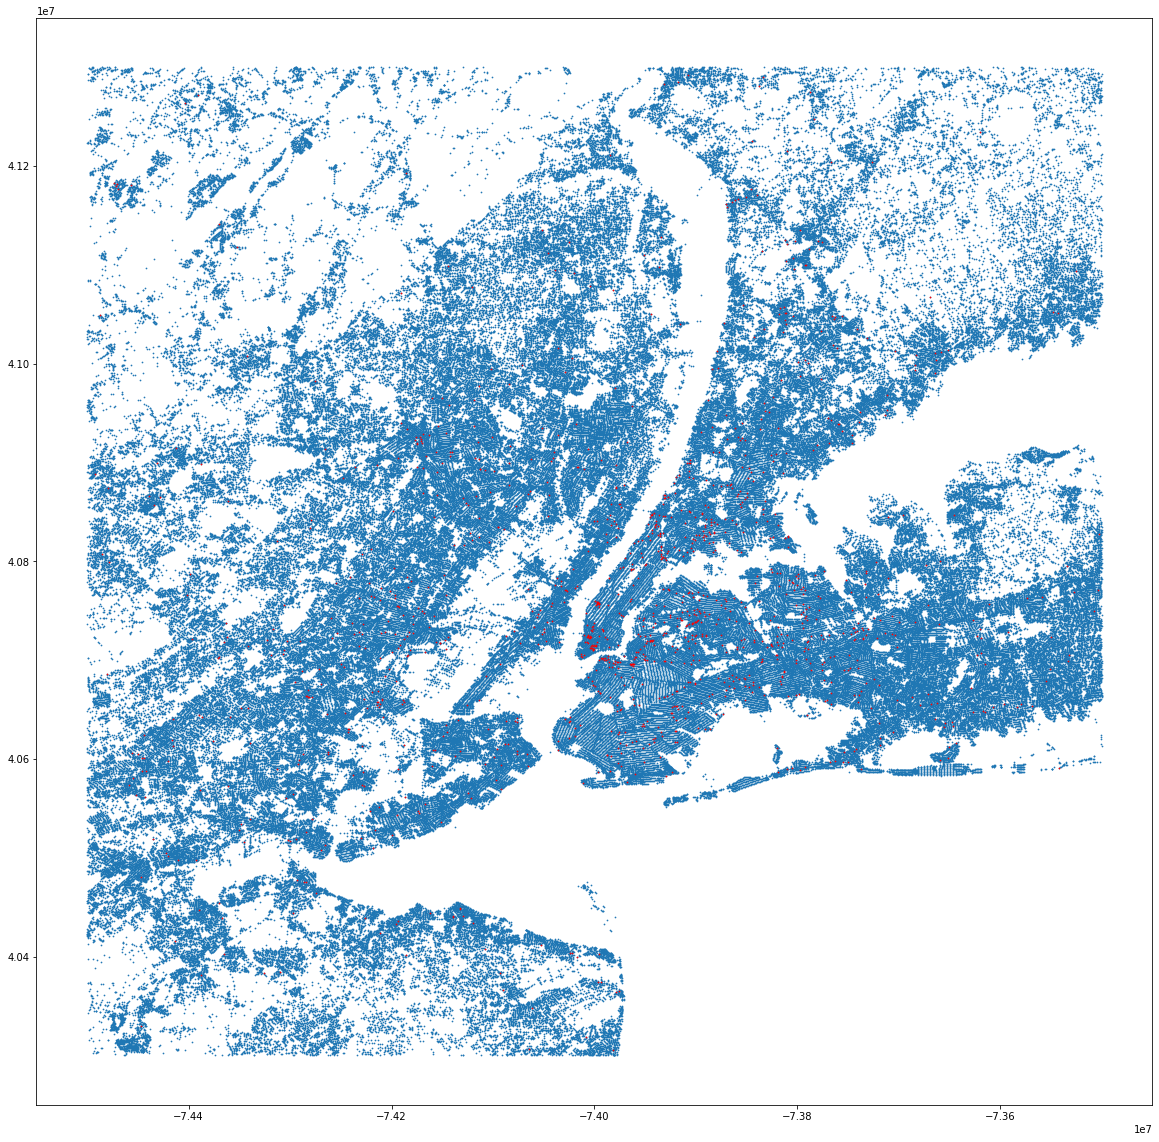

In [34]:
# 展示枢纽点
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

X = []
Y = []
for item in pivot_list2:
    x = city_co[item[0],1]
    y = city_co[item[0],2]
    X.append(x)
    Y.append(y)
    # plt.scatter(x,y,s=1,c='r')
# plt.savefig("map.png")
plt.scatter(x_list,y_list,s=0.5)
plt.scatter(X,Y,s=0.5,c='r')
plt.show()

In [78]:
filename = './pivot_list.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v, balance_value = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        Efield.append(int(v))
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """
pivot_list = np.array(Efield)
print(pivot_list)
# 对每个枢纽点，找出空间距离其最近的20个枢纽点，建立连边
pivot_nbr_dic = []
for i in pivot_list:
    dis_dic = {}
    for j in pivot_list:
        if i == j:
            continue
        dis_dic[j] = np.abs(city_co[i,1] - city_co[j,1]) + np.abs(city_co[i,2] - city_co[j,2])
    dis_SortList = sorted(dis_dic.items(),key = lambda x:x[1],reverse = False)
    pivot_nbr_dic.append(np.array(dis_SortList)[:20,0])
# print(pivot_nbr_dic)

[140961 141750 187961 ... 106977 250593 263850]


In [91]:
# 将枢纽点的20个附近枢纽点写入txt
# 格式为：每一行，第一个数字是当前枢纽点，后面20个数字是其附近20个枢纽点
with open('pivot_nbr_list.txt', 'w') as handle:
    for i in range(len(pivot_nbr_dic)):
        handle.write(
        "%d " % pivot_list[i]
        )
        for j in range(20):
            handle.write(
        "%d " % pivot_nbr_dic[i][j]
        )
        handle.write("\n")


### 读取每个枢纽点附近的枢纽点，然后进行建图。

In [95]:

filename = './pivot_nbr_list.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
         # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        for i in lines.split():
            item.append(int(i)) 
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """
pivot_nbr_list = np.array(Efield)
# print(Efield)

In [97]:
path = [1,2,3]
ff = np.array([2,3,5,8])
c = set(path) & set(ff)
print(len(c))

2


In [113]:

pivot_edge_list = []
pivot_path_list = []
for i in range(len(pivot_nbr_list)):
    start = pivot_nbr_list[i, 0]
    for j in range(1,21):
        target = pivot_nbr_list[i, j]
        path = nx.shortest_path(G, start, target)
        # path= nx.dijkstra_path(G, start, target)

        # 判断是否路径有经过其它枢纽点，若有，则不认为当前最短路径建立连边
        same_set = set(path) & set(pivot_list)
        # 如果除了起终点以外还有途径点，则进入下一次循环
        if len(same_set) >= 3:
            continue
        else:
            pivot_path_list.append(path)
            edge_item = []
            edge_item.append(start)
            edge_item.append(target)
            weight = nx.shortest_path_length(G,start,target,weight='weight')
            # weight = nx.dijkstra_path_length(G,start,target)
            edge_item.append(weight)
            pivot_edge_list.append(edge_item)


# print(path)

In [114]:
# 边集合，格式为：每一行start，target，weight，[path]
with open('pivot_edge_list.txt', 'w') as handle:
    for i in range(len(pivot_edge_list)):
        handle.write(
        "%d %d %d " % (pivot_edge_list[i][0],pivot_edge_list[i][1],pivot_edge_list[i][2])
        )
        for j in range(len(pivot_path_list[i])):
            handle.write(
        "%d " % pivot_path_list[i][j]
        )
        handle.write("\n")

## 分割子图
按照空间距离的方式，将除枢纽点以外的点划分进离其最近的枢纽点内。

In [119]:
subgraph_list = []
for i in range(len(city_co)):
    temp_dis_dic = {}
    for j in pivot_list:
        temp_dis_dic[j] = np.abs(city_co[i, 0] - city_co[j, 0]) + np.abs(city_co[i, 1] - city_co[j, 1])
    dis_SortList = sorted(temp_dis_dic.items(),key = lambda x:x[1],reverse = False)
    subgraph_list.append([i, np.array(dis_SortList)[0,0]])
subgraph_list = np.array(subgraph_list)
print(subgraph_list)

        

[[     0      5]
 [     1      5]
 [     2      5]
 ...
 [264343 252177]
 [264344 257475]
 [264345 236227]]


In [120]:
with open('subgraph_list.txt', 'w') as handle:
    for i in range(len(subgraph_list)):
        handle.write(
        "%d %d\n" % (subgraph_list[i][0],subgraph_list[i][1])
        )